<a href="https://colab.research.google.com/github/ASWATHI-A123/ASWATHI-A/blob/main/ASWATHI%20A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LOADING THE DATA SET

In [ ]:
data=pd.read_csv('/content/Wine_clust .csv')

In [ ]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.shape

(178, 13)

In [ ]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

PREPROCESSING THE DATA

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

CLUSTERING

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

KMEANS CLUSTERING

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10,random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_data)


In [ ]:
print("K-means clustering labels:")
print(kmeans_labels)

K-means clustering labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 0 2 2 1 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


AGGLOMERATIVE CLUSTERING

In [ ]:
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(scaled_data)

In [ ]:
print("\nAgglomerative clustering labels:")
print(agglomerative_labels)


Agglomerative clustering labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


DETERMINE OPTIMAL NUMBER OF CLUSTERS

---



FOR KMEANS USING ELBOW METHOD



In [ ]:
kmeans_scores = []
max_clusters = 10
for n_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters,n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    kmeans_scores.append(kmeans.inertia_)

In [ ]:
kmeans_optimal_clusters = np.argmin(kmeans_scores) + 1

In [ ]:
kmeans_model = KMeans(n_clusters=kmeans_optimal_clusters,n_init=10, random_state=42)
kmeans_labels = kmeans_model.fit_predict(scaled_data)

In [ ]:
print("Optimal number of clusters for K-means: {}".format(kmeans_optimal_clusters))

Optimal number of clusters for K-means: 10


In [ ]:
print("\nK-means clustering labels:")
print(kmeans_labels)


K-means clustering labels:
[9 9 8 1 8 1 9 8 9 9 1 9 9 1 1 8 8 8 1 9 9 2 9 8 8 8 8 9 8 9 8 1 8 8 8 8 8
 8 9 9 9 2 9 2 9 8 9 9 8 1 9 8 1 8 9 8 9 8 1 0 0 0 0 4 6 4 4 4 0 5 0 4 6 5
 4 0 0 0 5 2 4 4 6 3 4 4 6 6 6 6 6 6 6 4 4 5 5 4 4 4 4 0 4 4 4 6 4 6 4 4 2
 4 6 6 6 6 4 4 0 2 4 8 2 2 2 4 4 6 6 2 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3
 7 7 7 7 7 7 7 3 7 7 7 7 3 3 3 3 7 3 7 7 7 7 3 7 7 3 7 7 7 7]


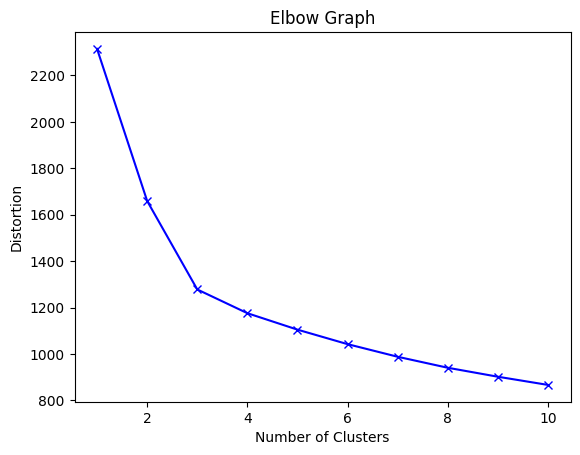

In [ ]:
plt.plot(range(1,max_clusters+1), kmeans_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Graph')
plt.show()

FOR AGGLOMERATIVE USING SILHOUTTE SCORE

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
agglomerative_scores = []
for n_clusters in range(2, max_clusters + 1):
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglomerative.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    agglomerative_scores.append(score)

In [ ]:
agglomerative_optimal_clusters = np.argmax(agglomerative_scores) + 2

In [ ]:
agglomerative_model = AgglomerativeClustering(n_clusters=agglomerative_optimal_clusters)
agglomerative_labels = agglomerative_model.fit_predict(scaled_data)

In [ ]:
print("Optimal number of clusters for Agglomerative clustering: {}".format(agglomerative_optimal_clusters))

Optimal number of clusters for Agglomerative clustering: 3


In [ ]:
print("\nAgglomerative clustering labels:")
print(agglomerative_labels)


Agglomerative clustering labels:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 2 2 0 1 0 1 2 0 2
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=10)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [ ]:
linkage_matrix = linkage(pca_data, method='ward')

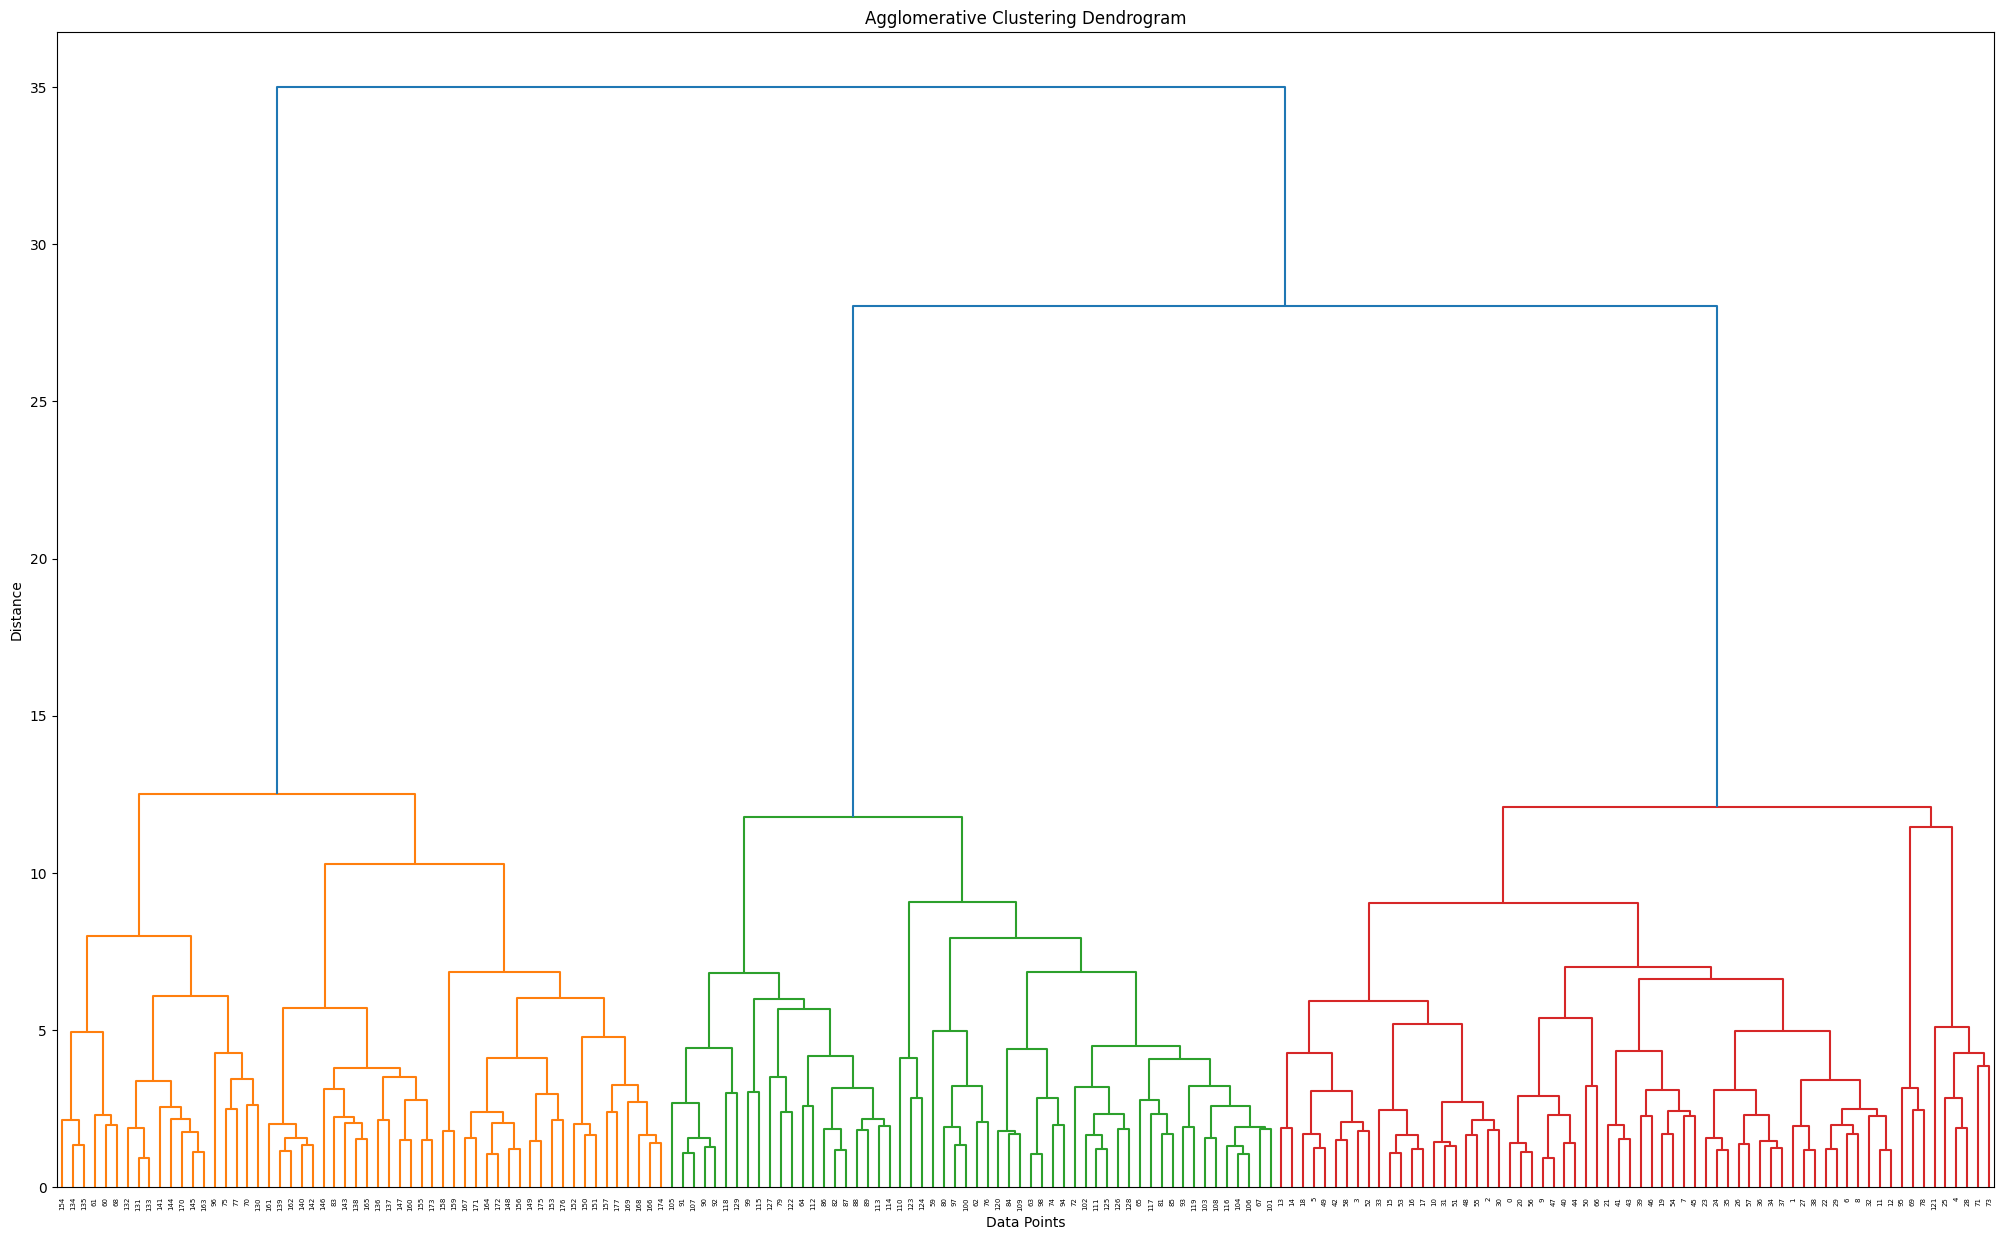

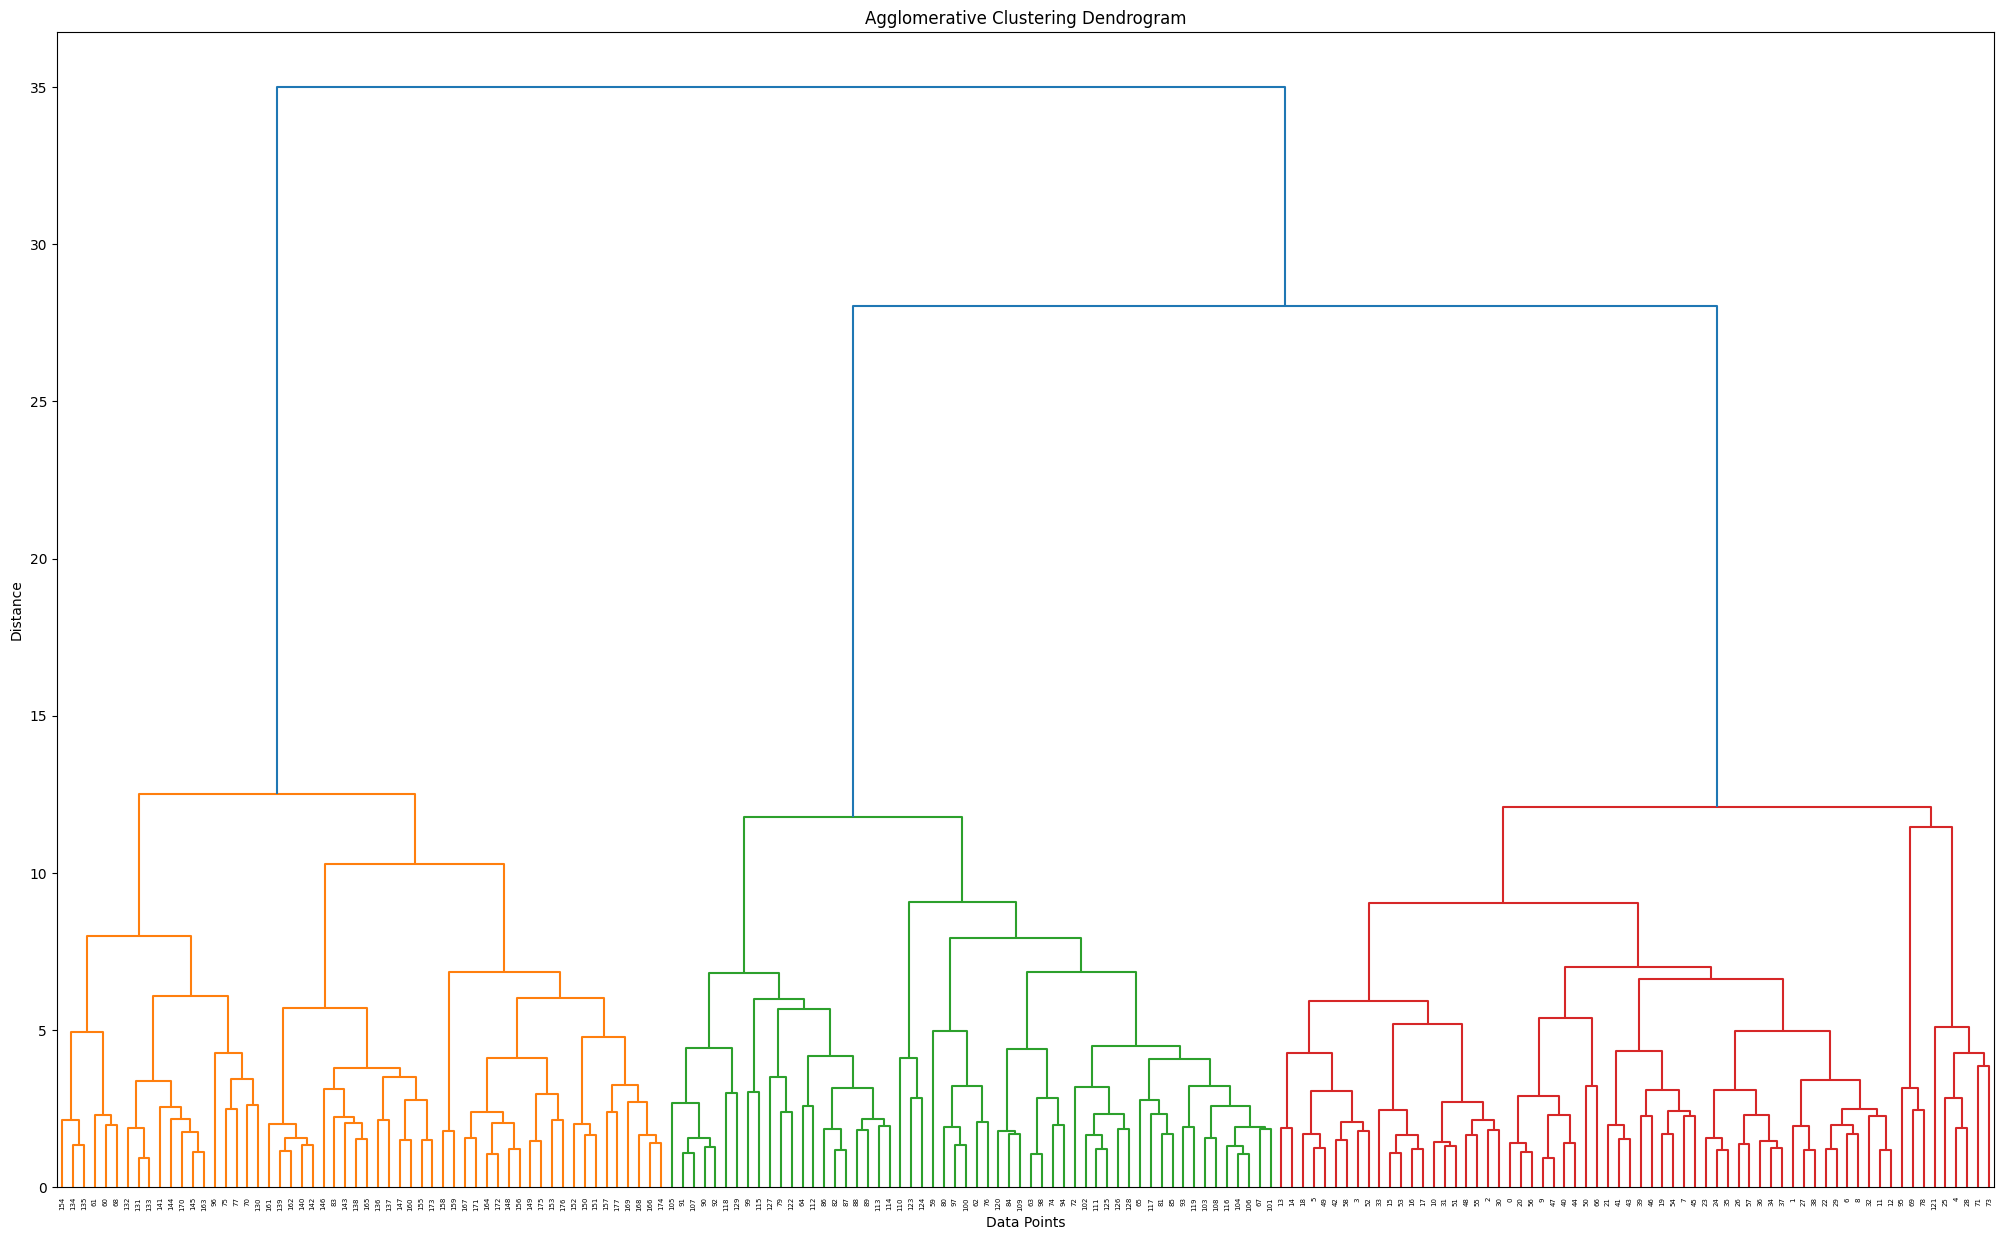

In [ ]:
plt.figure(figsize=(25,15))
dendrogram(linkage_matrix)
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

DBSCAN CLUSTERING

In [ ]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

In [ ]:
print("\nDBSCAN clustering labels:")
print(dbscan_labels)


DBSCAN clustering labels:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


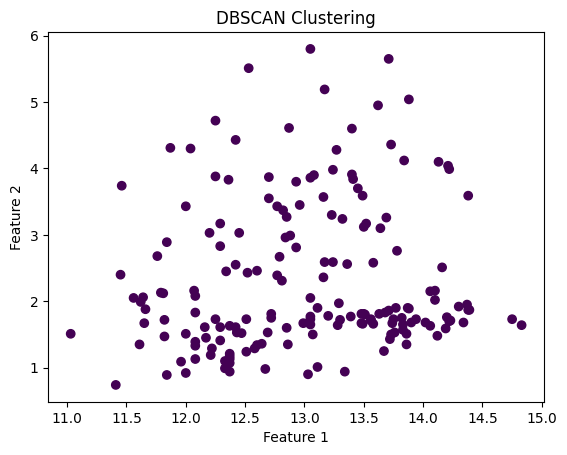

In [ ]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=labels, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()